In [8]:
# ===============================================================================
# MÉTODO DE ANÁLISIS DE COMPONENTES PRINCIPALES (ACP, PCA)
# ===============================================================================

# Librerías para tratamiento de datos
# ===============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Librerías para manejo de gráficos
# ===============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Librerías para preprocesado de datos y modelado
# ===============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Configuración warnings
# ===============================================================================
import warnings
warnings.filterwarnings('ignore')

# Cargar datos
# ===============================================================================
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.info()

# Exploración de datos
# ===============================================================================
print('----------------------')
print('Media de cada variable')
print('----------------------')
print(datos.mean(axis=0))

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(datos.var(axis=0))

# Entrenamiento del modelo PCA con escalado de los datos
# ===============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Componentes principales
componentes_df = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)
print('\nComponentes principales:\n')
print(componentes_df)


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
----------------------
Media de cada variable
----------------------
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Componentes principales:

       Murder   Assault  UrbanPop      Rape
PC1  0.535899  0.583184  0.278191  0.543432
PC2 -0.418181 -0.187986  0.872806  0.167319
PC3 -0.341233 -0.268148 -0.378016  0.817778
PC4 -0.649228  0.743407 -0.133878 -0.089024


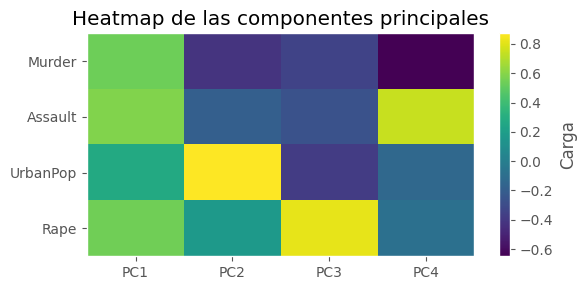

In [9]:
# Heatmap de los coeficientes de cada variable en los componentes
# ===============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
plt.imshow(modelo_pca.components_.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), ['PC1', 'PC2', 'PC3', 'PC4'])
plt.title("Heatmap de las componentes principales")
plt.colorbar(label='Carga')
plt.grid(False)
plt.tight_layout()
plt.show()


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


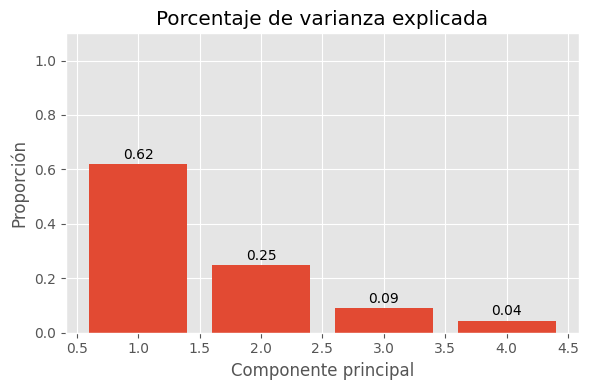

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


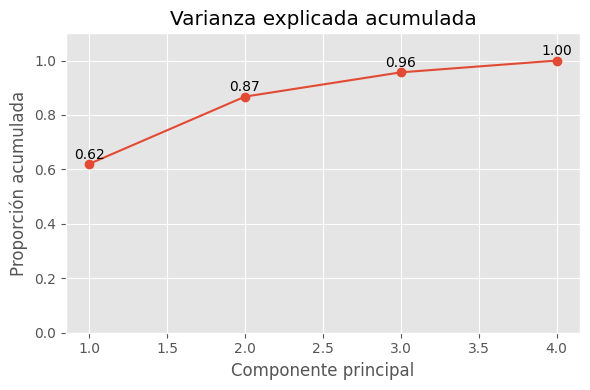

In [10]:
# Porcentaje de varianza explicada
# ===============================================================================
varianza_explicada = modelo_pca.explained_variance_ratio_
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(varianza_explicada)

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(np.arange(len(varianza_explicada)) + 1, varianza_explicada)
for i, v in enumerate(varianza_explicada):
    ax.text(i + 1, v + 0.02, f"{v:.2f}", ha='center')
ax.set_title('Porcentaje de varianza explicada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Proporción')
ax.set_ylim(0, 1.1)
plt.tight_layout()
plt.show()

# Porcentaje de varianza acumulada
# ===============================================================================
varianza_acumulada = varianza_explicada.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(varianza_acumulada)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(len(varianza_acumulada)) + 1, varianza_acumulada, marker='o')
for i, v in enumerate(varianza_acumulada):
    ax.text(i + 1, v + 0.02, f"{v:.2f}", ha='center')
ax.set_title('Varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Proporción acumulada')
ax.set_ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

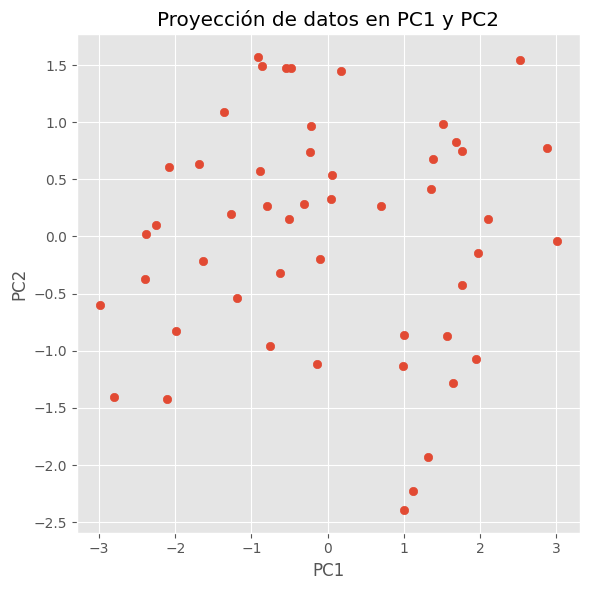

In [11]:
# Proyección de observaciones sobre los componentes principales
# ===============================================================================
proyecciones = pca_pipe.transform(datos)
proyecciones_df = pd.DataFrame(
    data    = proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)

# Gráfico de dispersión PC1 vs PC2
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(proyecciones_df['PC1'], proyecciones_df['PC2'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Proyección de datos en PC1 y PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Reconstrucción de los datos originales a partir de las componentes
# ===============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion_df = pd.DataFrame(
    recostruccion,
    columns = datos.columns,
    index   = datos.index
)

print('---------------------')
print('Valores reconstruidos (primeras filas)')
print('---------------------')
print(recostruccion_df.head())

print('------------------')
print('Valores originales (primeras filas)')
print('------------------')
print(datos.head())

# MODELO DE REGRESIÓN LINEAL MÚLTIPLE CON VARIABLES ORIGINALES
# ===============================================================================
X = datos[['Murder', 'Assault', 'Rape']]
y = datos['UrbanPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
modelo_regresion = sm.OLS(y_train, X_train).fit()
print('\nResumen del modelo con variables originales:')
print(modelo_regresion.summary())

---------------------
Valores reconstruidos (primeras filas)
---------------------
            Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2    236.0      58.0  21.2
Alaska        10.0    263.0      48.0  44.5
Arizona        8.1    294.0      80.0  31.0
Arkansas       8.8    190.0      50.0  19.5
California     9.0    276.0      91.0  40.6
------------------
Valores originales (primeras filas)
------------------
            Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

Resumen del modelo con variables originales:
                            OLS Regression Results                            
Dep. Variable:               UrbanPop   R-squared:                       0.267
Model:                 

In [13]:
# MODELO DE REGRESIÓN LINEAL MÚLTIPLE CON COMPONENTES PRINCIPALES
# ===============================================================================
X_pca = proyecciones_df
y_pca = datos['UrbanPop']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
X_train_pca = sm.add_constant(X_train_pca)
X_test_pca = sm.add_constant(X_test_pca)
modelo_regresion_pca = sm.OLS(y_train_pca, X_train_pca).fit()
print('\nResumen del modelo con componentes principales:')
print(modelo_regresion_pca.summary())


Resumen del modelo con componentes principales:
                            OLS Regression Results                            
Dep. Variable:               UrbanPop   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.871e+30
Date:                Sat, 08 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:13:12   Log-Likelihood:                 1204.2
No. Observations:                  40   AIC:                            -2398.
Df Residuals:                      35   BIC:                            -2390.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con